In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pickle
import itertools
import torch
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
import warnings
warnings.filterwarnings("ignore")

In [2]:
# check
train_loss_vanilla = np.load('results/a_Vanilla-NO/seed=0_n_used=0/loss_list.npy')
print(len(train_loss_vanilla))

50000


In [3]:
runtime_per_iter_vanilla = 0.344  # seconds
runtime_per_iter_latent = 0.256  # seconds

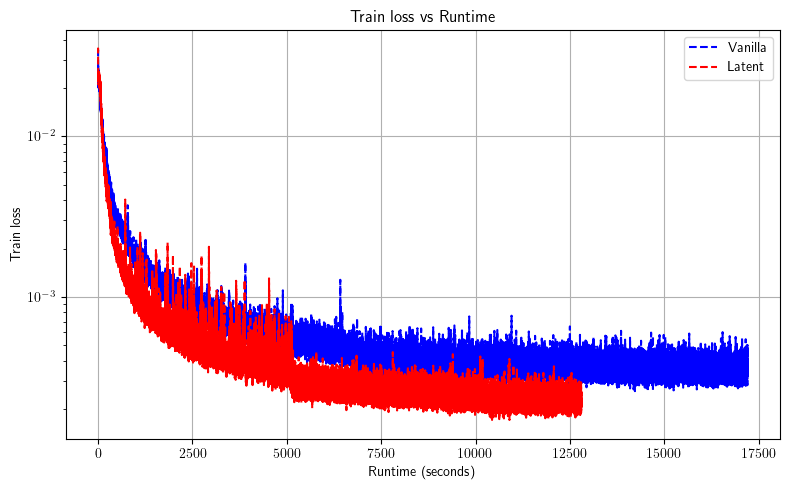

In [4]:
# Vanilla model
train_loss_vanilla = np.load('results/a_Vanilla-NO/seed=0_n_used=0/loss_list.npy')
iterations_vanilla = np.arange(1, len(train_loss_vanilla) + 1)
train_runtime_vanilla = iterations_vanilla * runtime_per_iter_vanilla

# Latent model
train_loss_latent = np.load('results/b_Latent-NO/seed=0_n_used=0/loss_list.npy')
iterations_latent = np.arange(1, len(train_loss_latent) + 1)
train_runtime_latent = iterations_latent * runtime_per_iter_latent

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(train_runtime_vanilla, train_loss_vanilla, color='b', linestyle='--', label='Vanilla')
plt.plot(train_runtime_latent, train_loss_latent, color='r', linestyle='--', label='Latent')
plt.xlabel("Runtime (seconds)")
plt.ylabel("Train loss")
plt.title("Train loss vs Runtime")
plt.legend()
plt.grid(True)
plt.yscale("log")
plt.tight_layout()
plt.show()

In [5]:
# check
print(train_runtime_vanilla)
print(train_runtime_latent)

[3.4400000e-01 6.8800000e-01 1.0320000e+00 ... 1.7199312e+04 1.7199656e+04
 1.7200000e+04]
[2.5600000e-01 5.1200000e-01 7.6800000e-01 ... 1.2799488e+04 1.2799744e+04
 1.2800000e+04]


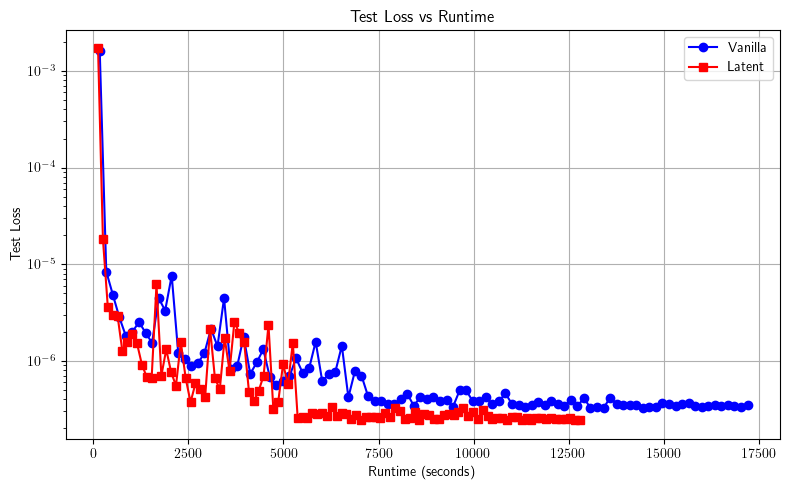

In [6]:
# Load test loss (every 500 iterations)
test_loss_vanilla = np.load('results/a_Vanilla-NO/seed=0_n_used=0/test_loss_list.npy')
test_loss_latent = np.load('results/b_Latent-NO/seed=0_n_used=0/test_loss_list.npy')

# Create runtime arrays for test loss (recorded every 500 iterations)
# So at 500, 1000, 1500, ..., 50000
test_iterations = np.arange(500, 500 * len(test_loss_vanilla) + 1, 500)
test_runtime_vanilla = test_iterations * runtime_per_iter_vanilla
test_runtime_latent = test_iterations * runtime_per_iter_latent

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(test_runtime_vanilla, test_loss_vanilla, color='b', linestyle='-', marker='o', label='Vanilla')
plt.plot(test_runtime_latent, test_loss_latent, color='r', linestyle='-', marker='s', label='Latent')
plt.xlabel("Runtime (seconds)")
plt.ylabel("Test Loss")
plt.title("Test Loss vs Runtime")
plt.legend()
plt.grid(True)
plt.yscale("log")
plt.tight_layout()
plt.show()

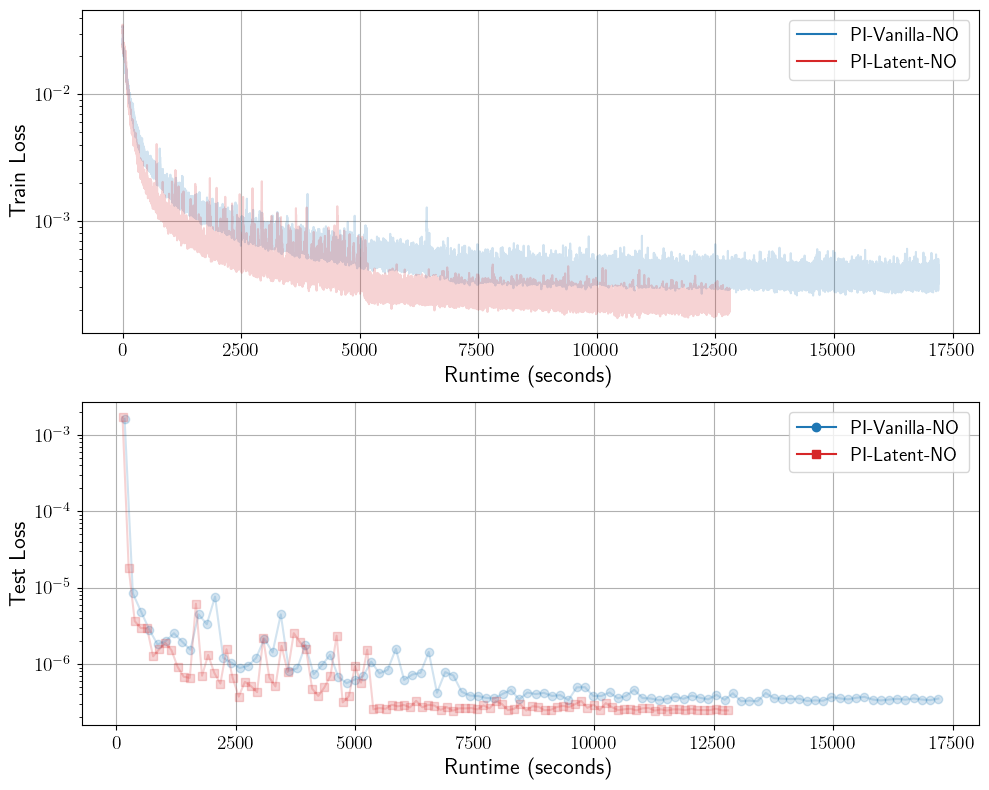

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load train loss
train_loss_vanilla = np.load('results/a_Vanilla-NO/seed=0_n_used=0/loss_list.npy')
train_loss_latent = np.load('results/b_Latent-NO/seed=0_n_used=0/loss_list.npy')
runtime_per_iter_vanilla = 0.344  # seconds
runtime_per_iter_latent = 0.256  # seconds
iterations = np.arange(1, len(train_loss_vanilla) + 1)

train_runtime_vanilla = iterations * runtime_per_iter_vanilla
train_runtime_latent = iterations * runtime_per_iter_latent

# Load test loss (every 500 iterations)
test_loss_vanilla = np.load('results/a_Vanilla-NO/seed=0_n_used=0/test_loss_list.npy')
test_loss_latent = np.load('results/b_Latent-NO/seed=0_n_used=0/test_loss_list.npy')
test_iterations = np.arange(500, 500 * len(test_loss_vanilla) + 1, 500)
test_runtime_vanilla = test_iterations * runtime_per_iter_vanilla
test_runtime_latent = test_iterations * runtime_per_iter_latent

# Setup the figure and axes
fig = plt.figure(figsize=(10, 8))

# Subplot 1: Train loss
ax1 = plt.subplot2grid((2, 1), (0, 0))
line1_t, = ax1.plot(train_runtime_vanilla, train_loss_vanilla, color="#1f77b4", alpha=0.2)
line2_t, = ax1.plot(train_runtime_latent, train_loss_latent, color="#d62728", alpha=0.2)
line1, = ax1.plot([], [], color="#1f77b4", label='PI-Vanilla-NO')
line2, = ax1.plot([], [], color="#d62728", label='PI-Latent-NO')
ax1.set_yscale("log")
ax1.set_xlabel('Runtime (seconds)', fontsize=16)
ax1.set_ylabel('Train Loss', fontsize=16)
ax1.legend(fontsize=14)
ax1.grid(True)

# Subplot 2: Test loss
ax2 = plt.subplot2grid((2, 1), (1, 0))
line3_t, = ax2.plot(test_runtime_vanilla, test_loss_vanilla, color="#1f77b4", linestyle='-', marker='o', alpha=0.2)
line4_t, = ax2.plot(test_runtime_latent, test_loss_latent, color="#d62728", linestyle='-', marker='s', alpha=0.2)
line3, = ax2.plot([], [], color="#1f77b4", marker='o', label='PI-Vanilla-NO')
line4, = ax2.plot([], [], color="#d62728", marker='s', label='PI-Latent-NO')
ax2.set_yscale("log")
ax2.set_xlabel('Runtime (seconds)', fontsize=16)
ax2.set_ylabel('Test Loss', fontsize=16)
ax2.legend(fontsize=14)
ax2.grid(True)

ax1.tick_params(axis='both', labelsize=14)  
ax2.tick_params(axis='both', labelsize=14)

# Update function
def update(frame):
    line1.set_data(train_runtime_vanilla[:frame], train_loss_vanilla[:frame])
    line2.set_data(train_runtime_latent[:frame], train_loss_latent[:frame])

    # For test loss, find the nearest test loss index
    test_frame = frame // 500
    if test_frame < len(test_loss_vanilla):
        line3.set_data(test_runtime_vanilla[:test_frame+1], test_loss_vanilla[:test_frame+1])
        line4.set_data(test_runtime_latent[:test_frame+1], test_loss_latent[:test_frame+1])

    return [line1, line2, line3, line4]

# Create animation
ani = FuncAnimation(fig, update, frames=range(0, len(train_loss_vanilla), 50), interval=20) #  Skip some frames — say, every 50 steps

# Show the animation
plt.tight_layout()
plt.show()

# Save the animation
ani.save('results/plots/Stove_Animation.mp4', writer='ffmpeg', fps=10)

# Draw final frame
line1.set_data(train_runtime_vanilla, train_loss_vanilla)
line2.set_data(train_runtime_latent, train_loss_latent)
line3.set_data(test_runtime_vanilla, test_loss_vanilla)
line4.set_data(test_runtime_latent, test_loss_latent)

# Save the final plot
fig.savefig("results/plots/loss_vs_runtime.pdf", format='pdf')